<a href="https://colab.research.google.com/github/kinjaljoshi/attention_usage/blob/main/self_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Attention

Attention** is an essential component of neural network **Transformers**


**Self-Attention**, allows to establish relationships among the words, characters and symbols, that are used for input and collectively called **Tokens**.


Before diving into the code, let’s understand how self-attention works conceptually.

Query (Q): Represents what each word is searching for in other words.
Key (K): Represents the meaning of each word that other words can search for.
Value (V): Represents the actual content that will be used in the attention calculation.

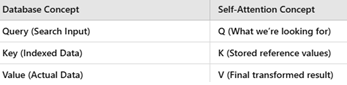



Let's say we have a customer database:

1. Query: “Find customers who bought Apple products.”
2. Key: Stored data like “Customer Purchase History.”
3. Value: The actual customer details.
In self-attention, instead of searching a database, we search words in the same sentence.

# Define word embeddings



In [18]:
import torch

# Define example token embeddings (word representations)
token_embeddings = torch.tensor([
    [1.16, 0.23],  # "He"
    [0.57, 1.36],  # "Eats"
    [4.41, -2.16]  # "Apple"
], dtype=torch.float32)  # Shape: (3, 2) -> 3 words, each 2-dimensional

# Initialize Query, Key, Value

In [19]:
import torch.nn as nn

# Define learnable weight matrices for Q, K, V (random initialization)
W_q = nn.Linear(2, 2, bias=False)
W_k = nn.Linear(2, 2, bias=False)
W_v = nn.Linear(2, 2, bias=False)

# Compute Queries, Keys, and Values
Q = W_q(token_embeddings)  # (3,2)
K = W_k(token_embeddings)  # (3,2)
V = W_v(token_embeddings)  # (3,2)

# Print values
print("Query (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)


Query (Q):
 tensor([[0.6280, 0.3725],
        [0.4280, 0.0586],
        [2.0970, 1.7193]], grad_fn=<MmBackward0>)

Key (K):
 tensor([[ 0.6564, -0.3415],
        [ 0.4528,  0.0570],
        [ 2.1781, -1.8451]], grad_fn=<MmBackward0>)

Value (V):
 tensor([[-0.3970, -0.2253],
        [-0.2985,  0.4742],
        [-1.2576, -2.2797]], grad_fn=<MmBackward0>)


# Calculate Similarity Score

In [20]:
similarity_scores = torch.matmul(Q, K.T)  # Shape (3,3) -> each word compared with all others
print("\nSimilarity Scores (QK^T):\n", similarity_scores)



Similarity Scores (QK^T):
 tensor([[0.2850, 0.3056, 0.6805],
        [0.2609, 0.1972, 0.8242],
        [0.7893, 1.0476, 1.3953]], grad_fn=<MmBackward0>)


# Scale Similarity score

In [21]:
import math

d_k = K.shape[1]  # d_k = 2
scaled_scores = similarity_scores / math.sqrt(d_k)

print("\nScaled Similarity Scores:\n", scaled_scores)



Scaled Similarity Scores:
 tensor([[0.2015, 0.2161, 0.4812],
        [0.1845, 0.1394, 0.5828],
        [0.5581, 0.7407, 0.9867]], grad_fn=<DivBackward0>)


#Apply Softmax to get attention weights

In [22]:
import torch.nn.functional as F

# Apply Softmax to get Attention Weights
attention_weights = F.softmax(scaled_scores, dim=-1)

print("\nAttention Weights (After Softmax):\n", attention_weights)



Attention Weights (After Softmax):
 tensor([[0.2996, 0.3040, 0.3963],
        [0.2903, 0.2775, 0.4323],
        [0.2677, 0.3213, 0.4109]], grad_fn=<SoftmaxBackward0>)


# Final attention is calculated by multiplying with Value


*   Each row in the final output represents a word in the new context-aware form.
*   Each word now contains information from all other words, weighted by attention.
* Words that were more important (high similarity score) influenced the final vector more.

* Before self-attention, values were arbitrary word embeddings.
* After self-attention, embeddings were weighted by attention scores, meaning some values increased while others normalized toward more balanced values.
* The network learned to shift representations to match the context.

In [28]:
# Compute final attention output
attention_output = torch.matmul(attention_weights, V)

print("He Eats Apple- ")
print("\nInitial Embedding : \n", token_embeddings)
print("\nFinal Attention Output:\n", attention_output)


He Eats Apple- 

Initial Embedding : 
 tensor([[ 1.1600,  0.2300],
        [ 0.5700,  1.3600],
        [ 4.4100, -2.1600]])

Final Attention Output:
 tensor([[0.6226, 0.1312],
        [0.5522, 0.2499],
        [0.5669, 0.2324]], grad_fn=<MmBackward0>)


**He Eats Apple.**

* "He" attended strongly to "Eats", meaning its representation shifted toward the action.
* "Eats" is affected by "He" and "Apple".
* "Apple" originally had high values, but self-attention reduced them.


